Comparing SVM , KNN and ELM for better accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("BATADAL_dataset04.csv")

In [4]:
df.columns

Index(['DATETIME', ' L_T1', ' L_T2', ' L_T3', ' L_T4', ' L_T5', ' L_T6',
       ' L_T7', ' F_PU1', ' S_PU1', ' F_PU2', ' S_PU2', ' F_PU3', ' S_PU3',
       ' F_PU4', ' S_PU4', ' F_PU5', ' S_PU5', ' F_PU6', ' S_PU6', ' F_PU7',
       ' S_PU7', ' F_PU8', ' S_PU8', ' F_PU9', ' S_PU9', ' F_PU10', ' S_PU10',
       ' F_PU11', ' S_PU11', ' F_V2', ' S_V2', ' P_J280', ' P_J269', ' P_J300',
       ' P_J256', ' P_J289', ' P_J415', ' P_J302', ' P_J306', ' P_J307',
       ' P_J317', ' P_J14', ' P_J422', ' ATT_FLAG'],
      dtype='object')

In [5]:
df

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,04/07/16 00,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1.0,...,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64,-999
1,04/07/16 01,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1.0,...,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15,-999
2,04/07/16 02,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1.0,...,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56,-999
3,04/07/16 03,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1.0,...,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38,-999
4,04/07/16 04,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1.0,...,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,24/12/16 20,2.65,2.37,3.85,3.04,3.82,4.94,2.19,120.08,1.0,...,70.03,27.38,84.14,18.45,81.67,18.34,66.04,29.88,28.98,-999
4173,24/12/16 21,2.24,2.56,3.42,2.92,3.69,5.02,1.97,119.12,1.0,...,68.60,27.66,83.46,25.40,60.85,25.28,66.89,30.19,29.29,-999
4174,24/12/16 22,1.91,2.76,2.95,2.49,2.70,5.14,1.87,120.71,1.0,...,85.63,26.84,82.82,24.46,59.56,24.34,66.08,29.68,28.78,-999
4175,24/12/16 23,1.52,2.52,3.33,2.03,1.69,5.10,1.39,120.02,1.0,...,86.15,25.78,103.63,24.77,59.01,24.65,66.42,28.98,28.08,-999


In [6]:
df[' ATT_FLAG'].unique()

array([-999,    1])

In [7]:
(df[' ATT_FLAG'].values==1).sum()


219

In [12]:
a=pd.read_csv("BATADAL_test_dataset.csv")
a.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422'],
      dtype='object')

In [13]:
X = df.drop(['DATETIME',' ATT_FLAG'],axis = 1).values
y = df[' ATT_FLAG'].values


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

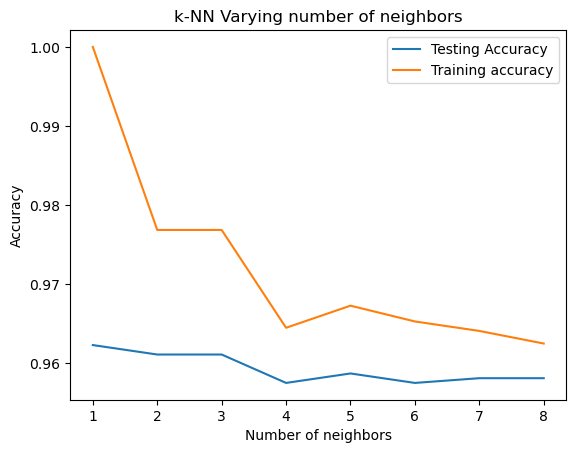

In [17]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=4)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
knn.score(X_test,y_test)

0.9575104727707959